In [260]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import math as m
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets


In [327]:
""" # images for training set

img0 = cv.imread('Negatives/20170315-085450-0.jpg')
img1 = cv.imread('Negatives/20170128-102117-0.jpg')
img2 = cv.imread('Negatives/20170630-153456-0.jpg')
img3 = cv.imread('Negatives/20171218-110544-2.jpg')
img4 = cv.imread('Weed-4class-30/20170217-113245-0.jpg')
img5 = cv.imread('Weed-4class-30/20170704-152032-0.jpg')
img6 = cv.imread('Weed-4class-30/20170920-095322-1.jpg')
img7 = cv.imread('Weed-4class-30/20170920-110952-2.jpg')
img8 = cv.imread('Weed-4class-30/20160928-141135-0.jpg')
img9 = cv.imread('Weed-4class-30/20161207-111342-0.jpg')
img10 = cv.imread('Weed-4class-30/20170811-103503-2.jpg')
img11 = cv.imread('Weed-4class-30/20170811-103929-2.jpg')
img12 = cv.imread('Weed-4class-30/20170811-110215-2.jpg')
img13 = cv.imread('Weed-4class-30/20170920-110646-3.jpg')
img14 = cv.imread('Weed-4class-30/20170920-132642-2.jpg')
img15 = cv.imread('Weed-4class-30/20171122-104414-1.jpg')
trainingSetArr = [img0, img1, img2, img3, img4, img5, img6,
                  img7, img8, img9, img10, img11, img12, img13, img14, img15]
trueAnswer = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y1 = np.array(trueAnswer)
y1 = y1.transpose()
print(y1.shape) """


" # images for training set\n\nimg0 = cv.imread('Negatives/20170315-085450-0.jpg')\nimg1 = cv.imread('Negatives/20170128-102117-0.jpg')\nimg2 = cv.imread('Negatives/20170630-153456-0.jpg')\nimg3 = cv.imread('Negatives/20171218-110544-2.jpg')\nimg4 = cv.imread('Weed-4class-30/20170217-113245-0.jpg')\nimg5 = cv.imread('Weed-4class-30/20170704-152032-0.jpg')\nimg6 = cv.imread('Weed-4class-30/20170920-095322-1.jpg')\nimg7 = cv.imread('Weed-4class-30/20170920-110952-2.jpg')\nimg8 = cv.imread('Weed-4class-30/20160928-141135-0.jpg')\nimg9 = cv.imread('Weed-4class-30/20161207-111342-0.jpg')\nimg10 = cv.imread('Weed-4class-30/20170811-103503-2.jpg')\nimg11 = cv.imread('Weed-4class-30/20170811-103929-2.jpg')\nimg12 = cv.imread('Weed-4class-30/20170811-110215-2.jpg')\nimg13 = cv.imread('Weed-4class-30/20170920-110646-3.jpg')\nimg14 = cv.imread('Weed-4class-30/20170920-132642-2.jpg')\nimg15 = cv.imread('Weed-4class-30/20171122-104414-1.jpg')\ntrainingSetArr = [img0, img1, img2, img3, img4, img5, i

In [331]:
#Weed DAta Set
WDS = pd.read_csv(
    "/Users/jcmon/Desktop/Master-Classes/DataMining1/Coding-Assignment1/DataMiningRepo1/Weed-4class-30/Weed-4class-30-labels.csv")
nWDS = pd.read_csv(
    "/Users/jcmon/Desktop/Master-Classes/DataMining1/Coding-Assignment1/DataMiningRepo1/Negatives/Negatives.csv")

WDS_neg = nWDS[nWDS['Species'] == 'Negative']
rVines = WDS[WDS['Species'] == 'Rubber vine']
negativeFiles = [str(pathlib.Path.cwd()/"Negatives"/ fn[0])
            for fn in WDS_neg.values]
rVineFiles = [str(pathlib.Path.cwd()/"Weed-4class-30"/ fn[0])
              for fn in rVines.values]

print(WDS_neg)
print(rVines)

                   Filename  Label   Species
0     20161207-112417-0.jpg      8  Negative
1     20161207-112431-0.jpg      8  Negative
2     20161207-112802-0.jpg      8  Negative
3     20161207-112812-0.jpg      8  Negative
4     20170128-101909-0.jpg      8  Negative
...                     ...    ...       ...
9101  20180322-133822-1.jpg      8  Negative
9102  20180322-133832-1.jpg      8  Negative
9103  20180322-133840-1.jpg      8  Negative
9104  20180322-133850-1.jpg      8  Negative
9105  20180322-133901-1.jpg      8  Negative

[9106 rows x 3 columns]
                   Filename  Label      Species
2199  20170913-100221-3.jpg      5  Rubber vine
2200  20170913-100304-3.jpg      5  Rubber vine
2201  20170913-100403-3.jpg      5  Rubber vine
2202  20170913-100429-3.jpg      5  Rubber vine
2203  20170913-100454-3.jpg      5  Rubber vine
...                     ...    ...          ...
3203  20171122-104241-1.jpg      5  Rubber vine
3204  20171122-104304-1.jpg      5  Rubber vine
320

In [389]:
trainingSetHistArr = []
for i in rVineFiles:
    image = cv.imread(i)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_hist = cv.calcHist([gray_image], [0], None, [256], [0, 256])
    trainingSetHistArr.append([gray_hist])

for i in negativeFiles:
    image = cv.imread(i)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_hist = cv.calcHist([gray_image], [0], None, [256], [0, 256])
    trainingSetHistArr.append([gray_hist])

x = np.array(trainingSetHistArr)
print(x.shape)
X = np.reshape(x, (10115, 256))
#X = X.transpose()
print(X.shape)
print(X)



(10115, 1, 256, 1)
(10115, 256)
[[ 25. 112. 109. ... 279.  83.   8.]
 [ 38. 139.  67. ... 127. 213.  43.]
 [ 54. 175. 143. ... 515. 290.  74.]
 ...
 [  0.  16.  26. ...  24.  18.   3.]
 [  7.  17.  41. ... 118. 112.  26.]
 [  8.  26.  51. ...  21.  16.   1.]]


In [388]:
isWDS = np.ones(1009)
isNOT_WDS = np.zeros(9106)
Y = np.concatenate((isWDS, isNOT_WDS))
print(Y.shape)

(10115,)


In [394]:
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
knn = KNeighborsClassifier(n_neighbors=1)
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred1 = knn1.predict(X_test)
y_pred2 = knn2.predict(X_test)
y_pred3 = knn3.predict(X_test)

print('knn accuracy score: ', knn.score(X_test, y_test))
print('knn1 accuracy score: ', knn1.score(X_test, y_test))
print('knn2 accuracy score: ', knn2.score(X_test, y_test))
print('knn3 accuracy score: ', knn3.score(X_test, y_test))
scores = cross_val_score(knn, X, Y, cv=5)
print(scores)

scores1 = cross_val_score(knn1, X, Y, cv=5)
print(scores1)
scores2 = cross_val_score(knn2, X, Y, cv=5)
print(scores2)
scores3 = cross_val_score(knn3, X, Y, cv=5)
print(scores3)


knn accuracy score:  0.8907563025210085
knn1 accuracy score:  0.9105289174493326
knn2 accuracy score:  0.9090459713297083
knn3 accuracy score:  0.9065743944636678
[0.84083045 0.82501236 0.87246663 0.89372219 0.84676223]
[0.87543253 0.84725655 0.89471083 0.90014829 0.87197232]
[0.8779041  0.85813149 0.89817103 0.90608008 0.86554622]
[0.89026199 0.87345526 0.89915966 0.90608008 0.87691547]


[1, 3, 5, 7]
[0.1442412259021255, 0.12209589718240232, 0.11883341571922867, 0.11576866040533873]


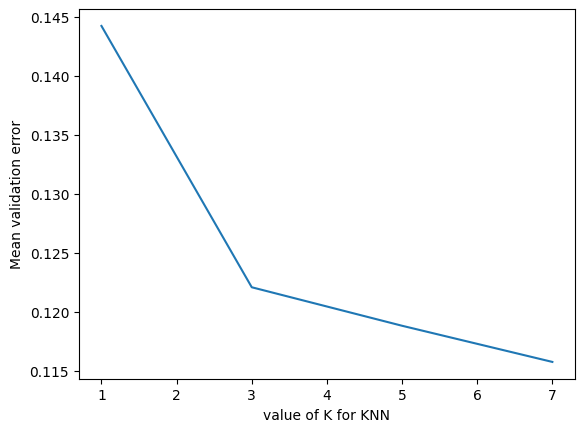

In [391]:
k_range = [1, 3, 5, 7]
knns = [knn, knn1, knn2, knn3]
print(k_range)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    k_scores.append(1-scores.mean())
print(k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('value of K for KNN')
plt.ylabel("Mean validation error")
plt.show()


k -7  has the lowest mean error based on the plot.

In [397]:
knn4 = KNeighborsClassifier(n_neighbors=7)
knn4.fit(X_train, y_train)
y_pred4 = knn3.predict(X_test)
print('knn test error: ', 1-knn.score(X_test, y_test))


knn test error:  0.10924369747899154


In [359]:
# Classifier 4,5,2: Peceptron, Random Forest Classifier, KNN - bagging
from sklearn.linear_model import Perceptron
allClasses = WDS
#print(allClasses)
allClassesValues= [str(pathlib.Path.cwd()/"Weed-4class-30"/ fn[0])
              for fn in allClasses.values]
print(allClassesValues)
trainingSetHistArr2 = []
for i in allClassesValues:
    image = cv.imread(i)
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_hist = cv.calcHist([gray_image], [0], None, [256], [0, 256])
    trainingSetHistArr2.append([gray_hist])
x2 = np.array(trainingSetHistArr2)
print(x2.shape)
X2 = np.reshape(x2, (4239, 256))
#X = X.transpose()
print(X2.shape)
print(X2)



['c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-140314-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-140337-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-140731-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-140747-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-141107-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-141135-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Classes\\DataMining1\\Coding-Assignment 2\\CodingAssignment2\\Weed-4class-30\\20160928-141355-0.jpg', 'c:\\Users\\jcmon\\Desktop\\Master-Class

In [384]:
is1 = np.array(['Chinee apple' for _ in range(1125)])
is2 = np.array(['Parkinsonia' for _ in range(1074)])
is3 = np.array(['Rubber Vine' for _ in range(1009)])
is4 = np.array(['Siam weed' for _ in range(1031)])

Y2 = np.concatenate((is1, is2))
Y2 = np.concatenate((Y2, is3))
Y2 = np.concatenate((Y2, is4))
print(Y2.shape)
print(Y2)



(4239,)
['Chinee apple' 'Chinee apple' 'Chinee apple' ... 'Siam weed' 'Siam weed'
 'Siam weed']


In [385]:


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=.2)
Pec = Perceptron(tol=1e3, random_state=0)
RFC = RandomForestClassifier(max_depth=2, random_state=0)
bag = BaggingClassifier()
bag.fit(X2_train, Y2_train)
RFC.fit(X2_train, Y2_train)
Pec.fit(X2_train, Y2_train)
scores1 = cross_val_score(Pec, X2, Y2, cv=5)
print(scores1)
scores2 = cross_val_score(RFC, X2, Y2, cv=5)
print(scores2)

scores3 = cross_val_score(bag, X2, Y2, cv=5)
print(scores3)

predictions = Pec.predict(X2_test)
predictions2 = RFC.predict(X2_test)
predictions3 = bag.predict(X2_test)

[0.49410377 0.44811321 0.50235849 0.44457547 0.28335301]
[0.4504717  0.57665094 0.58136792 0.50353774 0.48878394]
[0.51061321 0.75707547 0.70283019 0.63561321 0.57024793]


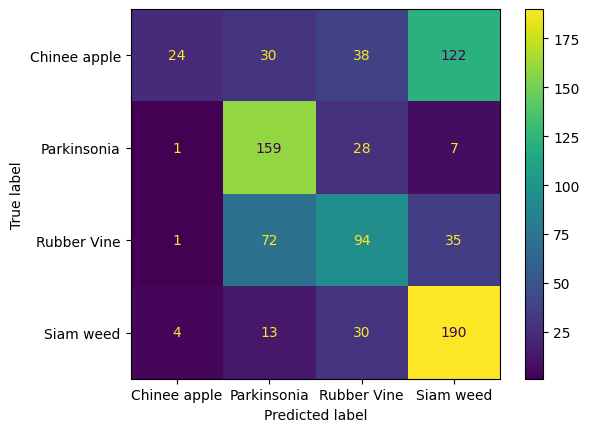

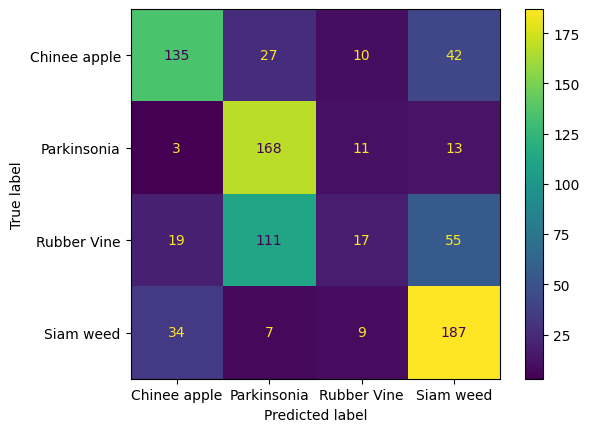

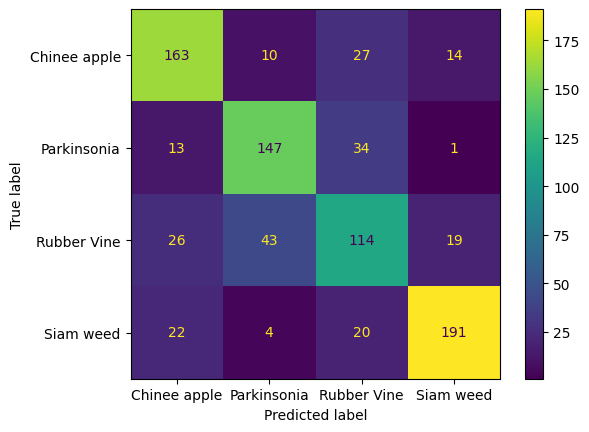

In [386]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

CMx1 = confusion_matrix(Y2_test, predictions, labels=Pec.classes_)
CMx2 = confusion_matrix(Y2_test, predictions2, labels=RFC.classes_)
CMx3 = confusion_matrix(Y2_test, predictions3, labels=bag.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CMx1, display_labels=Pec.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=CMx2, display_labels=RFC.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=CMx3, display_labels=bag.classes_)

disp.plot()
plt.show()
disp1.plot()
plt.show()
disp2.plot()
plt.show()


Based on the confusion matrices KNN bagging is the best method, As it has the most matches between predicted label and true label

Based on the validation accuracies matrices KNN bagging is the best method. They are the highest.



In [399]:
testAccuracy = (24 + 159 + 94 + 190)/(24 + 159 + 94 + 190 + 1 + 1 + 4 + 13 + 30 + 72 + 35 + 28 + 30 +7 + 38 + 122)
print(testAccuracy)
testAccuracy1 = (17 + 168 + 135 + 187)/(17 + 168 + 135 + 187 + 3 + 19 + 34 + 7 + 9 + 111 + 55 + 11 + 27 + 13 + 10 + 42)
print(testAccuracy1)
testAccuracy2 = (163 + 147 + 114 + 191)/(163 + 147 + 114 + 191 + 13 + 26 + 22 + 4 + 20 + 43 + 19 + 34 + 10 + 1 + 27 + 14)
print(testAccuracy2)

0.5507075471698113
0.597877358490566
0.7252358490566038


In [403]:
from sklearn.metrics import f1_score
f_score_1 = f1_score(Y2_test, predictions, average='weighted')
f_score_2 = f1_score(Y2_test, predictions2, average='weighted')
f_score_3 = f1_score(Y2_test, predictions3, average='weighted')
print(f_score_1)
print(f_score_2)
print(f_score_3)

0.49950375293243526
0.5486015778085324
0.7251578583335976
